# Decision Tree Visualisation

Prerequisites: To run this notebook you would need to install the `graphviz` and `python-graphviz` packages in your conda environment:

```bash
$ conda install graphviz, python-graphviz --yes
```

In [1]:
# Model Persistence
from joblib import load
from sklearn.tree import export_graphviz
import graphviz

In [2]:
import os
from pathlib import Path

MODEL_FOLDER = Path(os.path.abspath(os.path.curdir)) / "models"
TREE_FOLDER = Path(os.path.abspath(os.path.curdir)) / "trees"

os.makedirs(MODEL_FOLDER, exist_ok=True)
os.makedirs(TREE_FOLDER, exist_ok=True)

Decision Tree (w/ Under Sampling, Near Miss)

In [3]:
# Export the decision tree to a dot file
def visualize_tree(dt, feature_names: list[str], label: str, 
                   root_folder: str = TREE_FOLDER, export: bool = True):
    dot_data = export_graphviz(dt, out_file=None,
                            feature_names=feature_names,
                            class_names=['No Fraud', 'Fraud'], filled=True)
    graph = graphviz.Source(dot_data)
    if export:
        label = label.lower().replace(" ", "_")
        # Save the graph as a jpg or pdf file
        graph.format = 'jpg' #'pdf'
        graph.render(root_folder / label)

    return graph



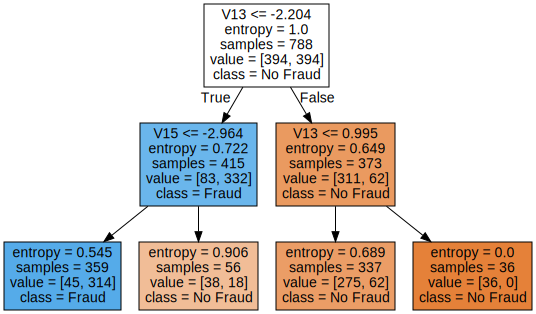

In [4]:
dt_nm_filepath = MODEL_FOLDER / "gs_decision_tree_under_sampling_near_miss.joblib"
gs_dt_nearmiss = load(dt_nm_filepath)

dt = gs_dt_nearmiss.best_estimator_.named_steps["model"]
feature_names = gs_dt_nearmiss.feature_names_in_

visualize_tree(dt, feature_names=feature_names, label="Decision Tree Near Miss", export=True)

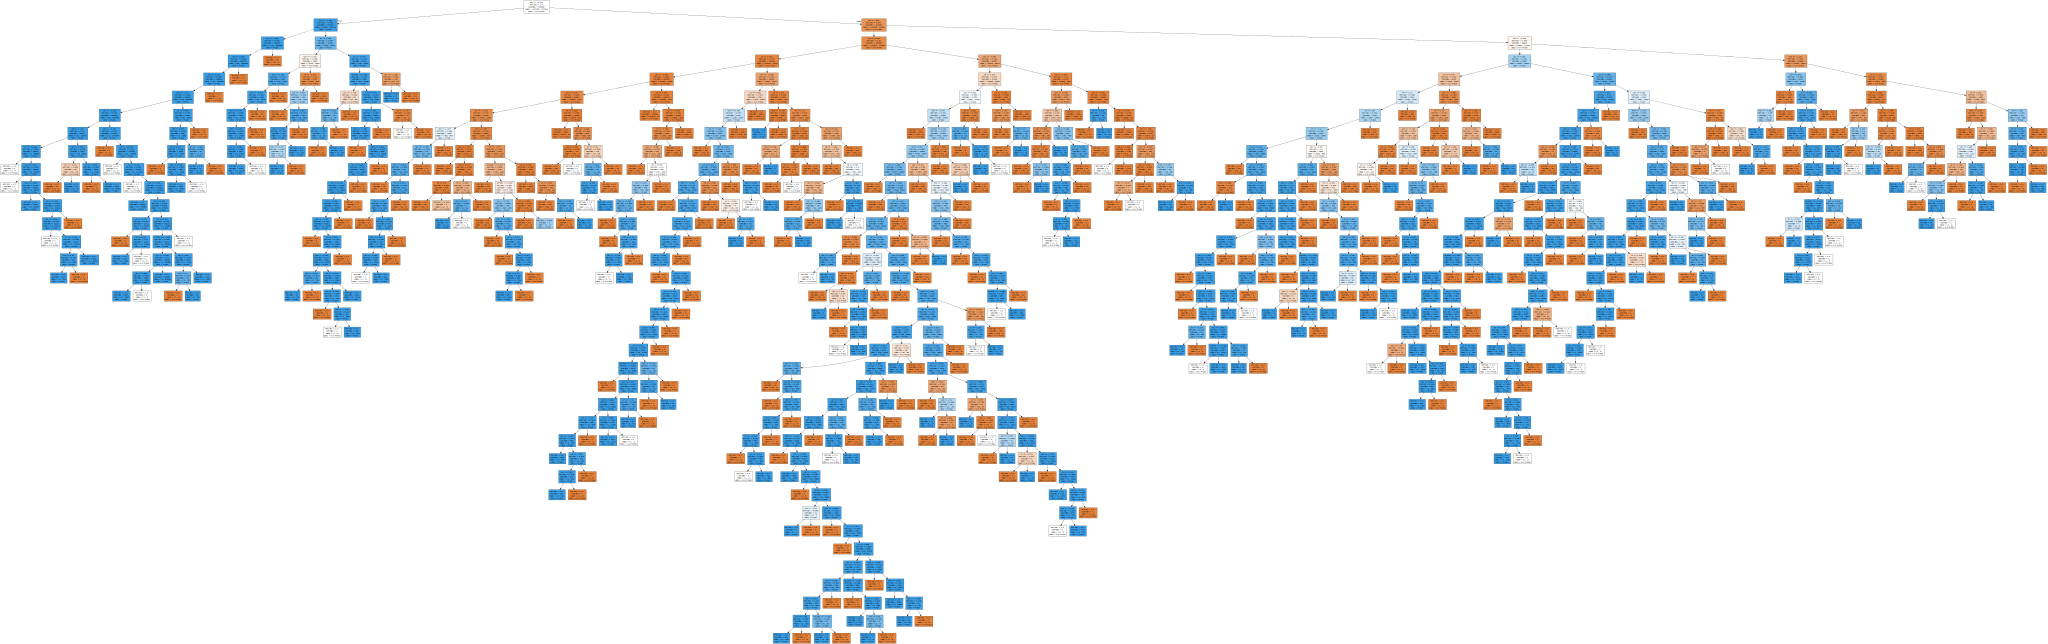

In [5]:
dt_smote_filepath = MODEL_FOLDER / "gs_decision_tree_over_sampling_smote.joblib"
gs_dt_smote = load(dt_smote_filepath)

dt_smote = gs_dt_smote.best_estimator_.named_steps["model"]
feature_names_smote = gs_dt_smote.feature_names_in_

visualize_tree(dt_smote, feature_names=feature_names_smote, label="Decision Tree SMOTE", export=True)

## Random Forest

In [6]:
rf_nm_filepath = MODEL_FOLDER / "gs_random_forest_under_sampling_near_miss.joblib"
gs_rf_nm = load(rf_nm_filepath)

rf_nm = gs_rf_nm.best_estimator_.named_steps["model"]
feature_names_nm = gs_rf_nm.feature_names_in_

rf_nm_root_folder = TREE_FOLDER / "rf_near_miss"
os.makedirs(rf_nm_root_folder, exist_ok=True)

for t, tree in enumerate(rf_nm.estimators_):
    _ = visualize_tree(tree, feature_names=feature_names_smote,
                       label=f"Random Forest NearMiss (DT{t})", root_folder=rf_nm_root_folder)

In [7]:
rf_smote_filepath = MODEL_FOLDER / "gs_random_forest_over_sampling_smote.joblib"
gs_rf_smote = load(rf_smote_filepath)

rf_smote = gs_rf_smote.best_estimator_.named_steps["model"]
feature_names_smote = gs_rf_smote.feature_names_in_

rf_smote_root_folder = TREE_FOLDER / "rf_smote"
os.makedirs(rf_smote_root_folder, exist_ok=True)

for t, tree in enumerate(rf_smote.estimators_):
    _ = visualize_tree(tree, feature_names=feature_names_smote,
                       label=f"Random Forest SMOTE (DT{t})", root_folder=rf_smote_root_folder)